# API Demo
This notebook demonstrates usage of the craterfind API using a minimal python app. The first cell contains the code that will do the necessary things.

In [5]:
import json
import subprocess

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from matplotlib.patches import Circle

def load_image(path='./data/0.png'):
    img = (imread(path)*255).astype(np.uint8)
    return img

def prepare_image(img):
    img = img.flatten()
    return img

def prepare_request(array):
    base_url = "http://localhost:8501/v1/models/craters:predict"
    data = {
        "instances":[array.tolist()]
    }
    data_json = json.dumps(data)
    formatted = f"curl -d '{data_json}' -X POST {base_url}"
    return formatted

def make_request(request_string):
    response = subprocess.check_output(request_string, shell=True).decode()
    response_data = eval(response)
    return response_data
    

def plot_prediction(img, prediction):
    x,y,r = prediction
    fig, ax = plt.subplots(1)
    prediction = Circle(xy=(x,y), radius=r, fill=False)
    ax.add_artist(prediction)
    ax.imshow(img, cmap='Greys_r')

# Start with an Image
The model only takes pixels as an input. The annotator-provided crater location is implied to be in the center of the input image. This POC just deals with images of 32x32 pixels, like the following:

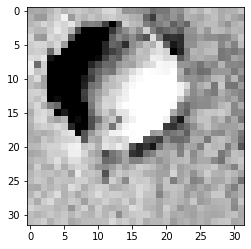

In [7]:
#randomly select an image from test data
n = np.random.randint(300)
#load image and convert to integer pixel values
img = load_image(f'./data/{n}.png')
plt.imshow(img, cmap='Greys_r');

# Transform Pixels
The raw pixel data needs to be flattened into a single vector.

In [8]:
#this function does the transformation
array = prepare_image(img)

#inspect resulting data:
print("Shape of image data: ", array.shape)

Shape of image data:  (1024,)


# Form Request
The API can be hit with a POST request and json body. The curl format would be:

`curl -d '{"instances":[[pixels]]}' -X POST http://localhost:<ip>/v1/models/craters:predict`

This is done here:

In [9]:
curl_request = prepare_request(array)
#see what it looks like:
print(curl_request)

curl -d '{"instances": [[142, 145, 142, 153, 175, 153, 167, 175, 166, 156, 162, 188, 193, 167, 126, 129, 123, 119, 88, 100, 101, 129, 121, 151, 165, 152, 175, 160, 144, 149, 151, 168, 150, 131, 130, 161, 180, 227, 132, 167, 153, 169, 156, 171, 179, 163, 162, 150, 145, 83, 49, 116, 106, 126, 106, 151, 146, 139, 154, 163, 145, 157, 141, 131, 154, 165, 187, 173, 200, 186, 210, 158, 105, 112, 105, 52, 0, 61, 180, 159, 153, 105, 90, 107, 122, 78, 102, 83, 143, 151, 160, 158, 140, 125, 150, 158, 168, 155, 155, 179, 213, 187, 155, 60, 0, 0, 0, 0, 45, 91, 121, 146, 120, 181, 109, 74, 85, 97, 74, 124, 126, 153, 130, 160, 156, 143, 156, 152, 188, 134, 129, 189, 176, 190, 74, 0, 0, 0, 0, 0, 78, 116, 96, 120, 87, 65, 197, 105, 39, 43, 38, 117, 120, 132, 120, 121, 112, 115, 139, 170, 178, 188, 187, 165, 190, 134, 0, 0, 0, 0, 0, 33, 84, 74, 38, 120, 138, 162, 149, 205, 81, 21, 38, 123, 123, 147, 150, 157, 116, 140, 111, 159, 175, 181, 174, 88, 171, 0, 0, 0, 0, 0, 0, 34, 52, 67, 101, 128, 166, 157, 1

# Send Request, Parse Response

In [19]:
response = make_request(curl_request)
#response contains x, y, and r predictions for crater.
print(response)

{'predictions': [[12.2411947, 16.6599426, 9.33994293]]}


# Plot Prediction

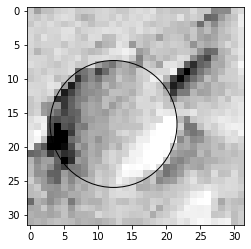

In [20]:
prediction = response['predictions'][0]
plot_prediction(img, prediction)